# Net Bookings by Device Type and Region (FBU)

In [14]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

In [15]:
all_dev = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/AllMetrics_Jan31/deviceForecasts/alldata_regions_device.csv')
all_dev["y"] = pd.to_numeric(all_dev["y"], downcast='float')
all_dev.head()

,ds,Region,Device,y,year,mon,dow
0,1/1/17,CE,desktop,570.0,2017,Jan,Sunday
1,1/1/17,CE,mobile App,25.0,2017,Jan,Sunday
2,1/1/17,CE,mobile web,72.0,2017,Jan,Sunday
3,1/1/17,CE,tablet,191.0,2017,Jan,Sunday
4,1/1/17,CE,Unknown,125.0,2017,Jan,Sunday


In [16]:
all_dev["Device"] = all_dev["Device"].astype('category')
all_dev.dtypes

all_dev["dev_cat"] = all_dev["Device"].cat.codes
all_dev.head()

,ds,Region,Device,y,year,mon,dow,dev_cat
0,1/1/17,CE,desktop,570.0,2017,Jan,Sunday,1
1,1/1/17,CE,mobile App,25.0,2017,Jan,Sunday,2
2,1/1/17,CE,mobile web,72.0,2017,Jan,Sunday,3
3,1/1/17,CE,tablet,191.0,2017,Jan,Sunday,4
4,1/1/17,CE,Unknown,125.0,2017,Jan,Sunday,0


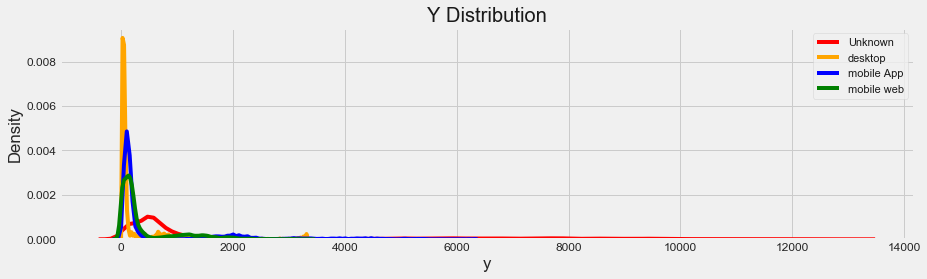

In [17]:
from collections import OrderedDict

plt.figure(figsize = (30, 7))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green',
                     5: 'yellow'})
dev_mapping = OrderedDict({1: 'Unknown', 2: 'desktop', 3: 'mobile App', 4: 'mobile web',
                              5: 'tablet'})

# Iterate through the float columns
# for i, col in enumerate(all_rlt.select_dtypes('float')):
# for i, col in enumerate(all_rlt['y']):
# for i, col in enumerate(all_rlt.select_dtypes('int')):
for i, col in enumerate(all_dev.select_dtypes('float32')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the devices
    for device_type, color in colors.items():
        # Plot each device type as a separate line
        sns.kdeplot(all_dev.loc[all_dev['dev_cat'] == device_type, col].dropna(), 
                    ax = ax, color = color, label = dev_mapping[device_type])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

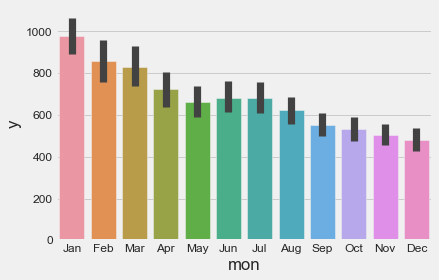

In [18]:
ax = sns.barplot(x="mon", y="y", data=all_dev)

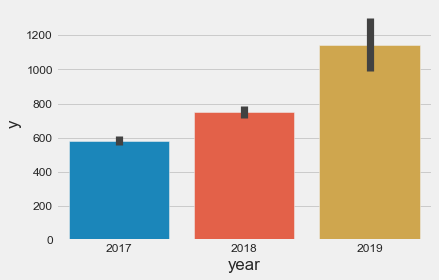

In [19]:
ax = sns.barplot(x="year", y="y", data=all_dev)

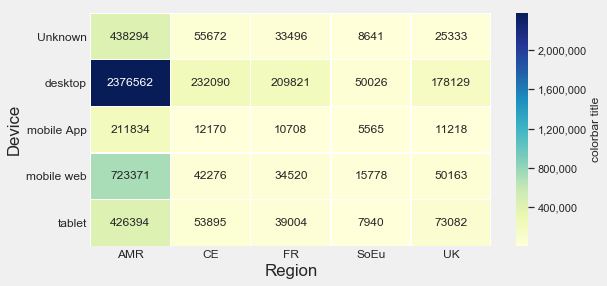

In [20]:
all_dev17 = all_dev.loc[all_dev['year'] == 2017]
all_dev_pivot = all_dev17.pivot_table(index='Device', columns='Region', values='y', aggfunc = np.sum)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)

from matplotlib.ticker import FuncFormatter
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

sns_plot = sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("dev_region_nb_2017.png")

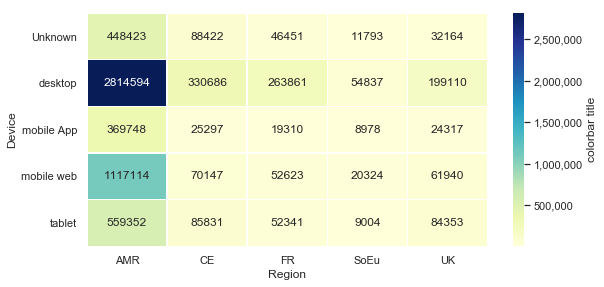

In [22]:
all_dev18 = all_dev.loc[all_dev['year'] == 2018]
all_dev_pivot = all_dev18.pivot_table(index='Device', columns='Region', values='y', aggfunc = np.sum)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)
from matplotlib.ticker import FuncFormatter

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns_plot = sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("dev_region_nb_2018.png")

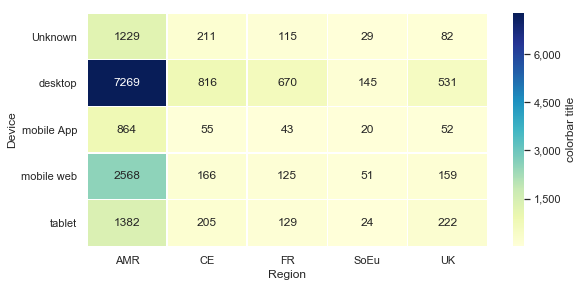

In [24]:
all_dev_pivot = all_dev.pivot_table(index='Device', columns='Region', values='y', aggfunc = np.mean)

f, ax = plt.subplots(figsize=(8, 4))
sns.set(font_scale=1.0)
from matplotlib.ticker import FuncFormatter

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns_plot = sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu",  
           cbar_kws={'label': 'colorbar title','format':comma_fmt})
fig = sns_plot.get_figure()
fig.savefig("dev_region_nb.png")

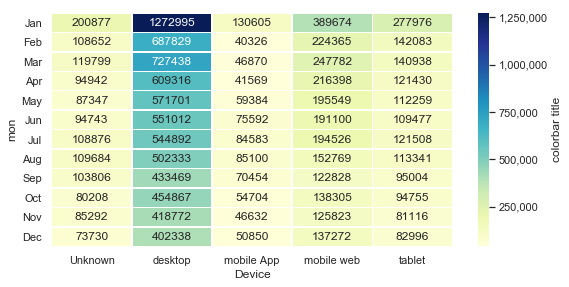

In [25]:
all_dev_pivot = all_dev.pivot_table(index='mon', columns='Device', values='y', aggfunc = np.sum)
all_dev_pivot.index = pd.CategoricalIndex(all_dev_pivot.index, 
                                   categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
all_dev_pivot.sort_index(level=0, inplace=True)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

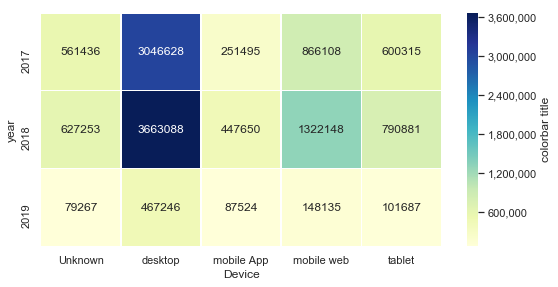

In [27]:
all_dev_pivot = all_dev.pivot_table(index='year', columns='Device', values='y', aggfunc = np.sum)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

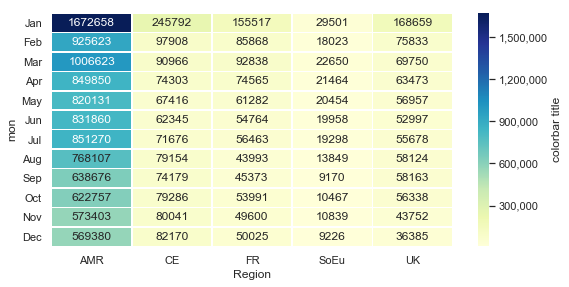

In [28]:
all_dev_pivot = all_dev.pivot_table(index='mon', columns='Region', values='y', aggfunc = np.sum)
all_dev_pivot.index = pd.CategoricalIndex(all_dev_pivot.index, 
                                   categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
all_dev_pivot.sort_index(level=0, inplace=True)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

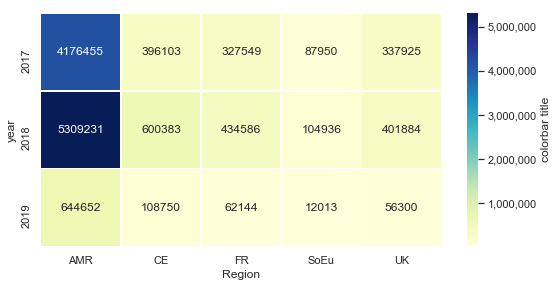

In [29]:
all_dev_pivot = all_dev.pivot_table(index='year', columns='Region', values='y', aggfunc = np.sum)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(all_dev_pivot, annot=True, fmt = '.0f', linewidths=.5, ax=ax, cmap="YlGnBu", 
           cbar_kws={'label': 'colorbar title','format':comma_fmt})

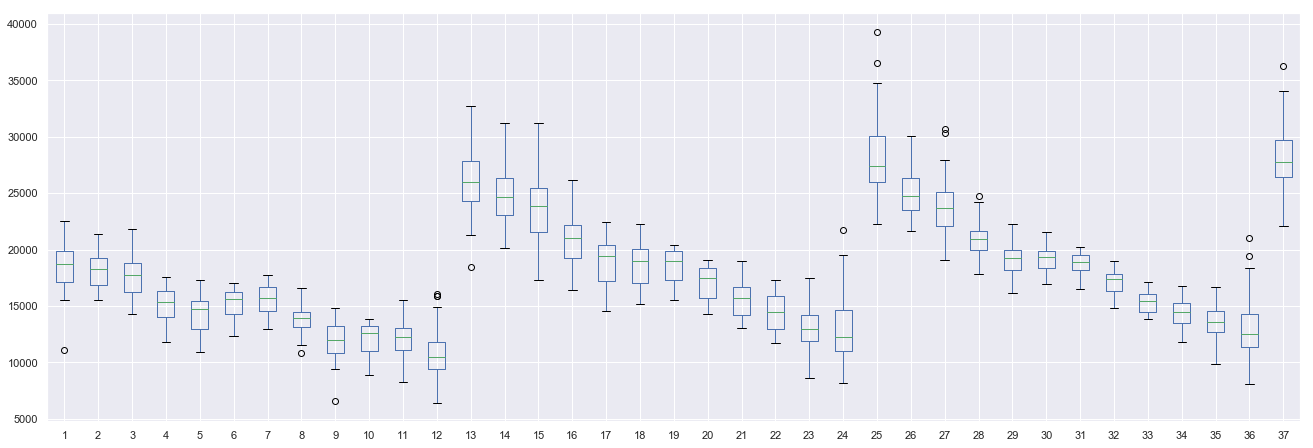

In [34]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7

series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_device_forecasts.csv", header=0)
#series = Series.from_array(df['net_bookings'])
groups = series.groupby(TimeGrouper('M'))
#years = DataFrame()
months = DataFrame()
#for name, group in groups:
#	months[name.month] = group.values
#months.plot(subplots=True, legend=False)
#pyplot.show()

months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,38)
months.boxplot()

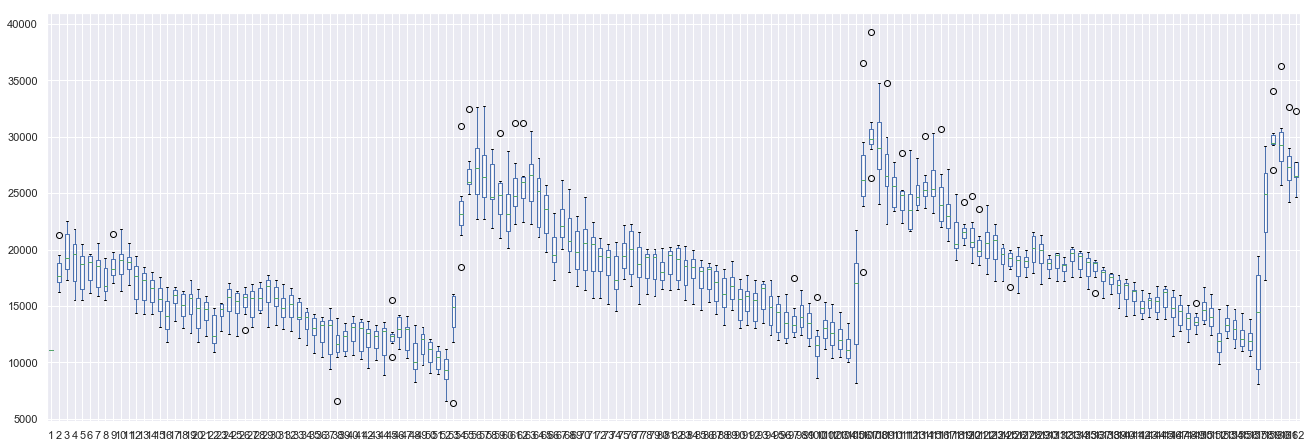

In [35]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pylab import rcParams

rcParams['figure.figsize'] = 20, 7

series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_device_forecasts.csv", header=0)
groups = series.groupby(TimeGrouper('W'))
#years = DataFrame()
months = DataFrame()
#for name, group in groups:
#	months[name.month] = group.values
#months.plot(subplots=True, legend=False)
#pyplot.show()

months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,163)
months.boxplot()

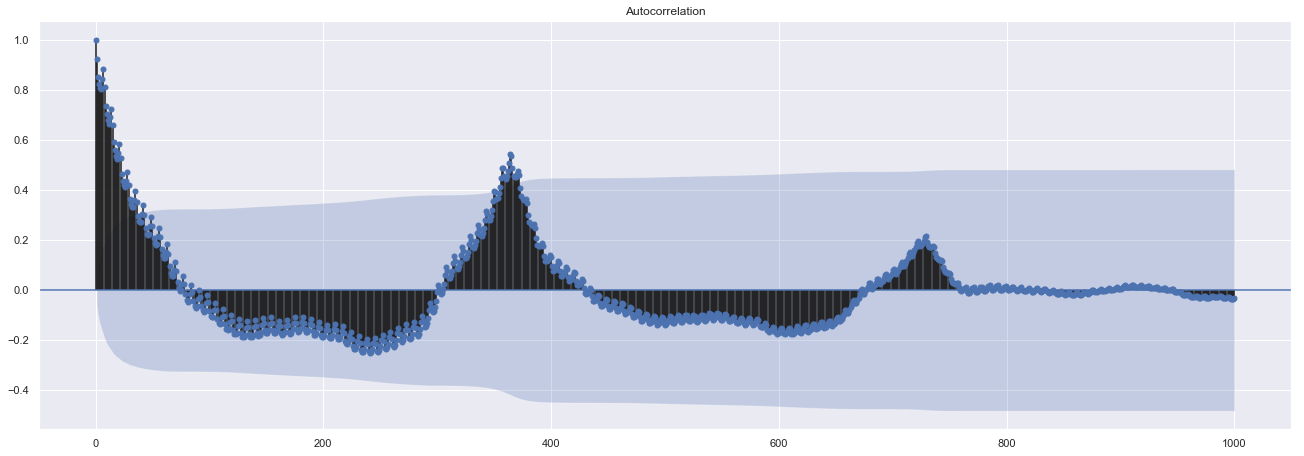

In [36]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_device_forecasts.csv", header=0)
plot_acf(series, lags=1000)
pyplot.show()

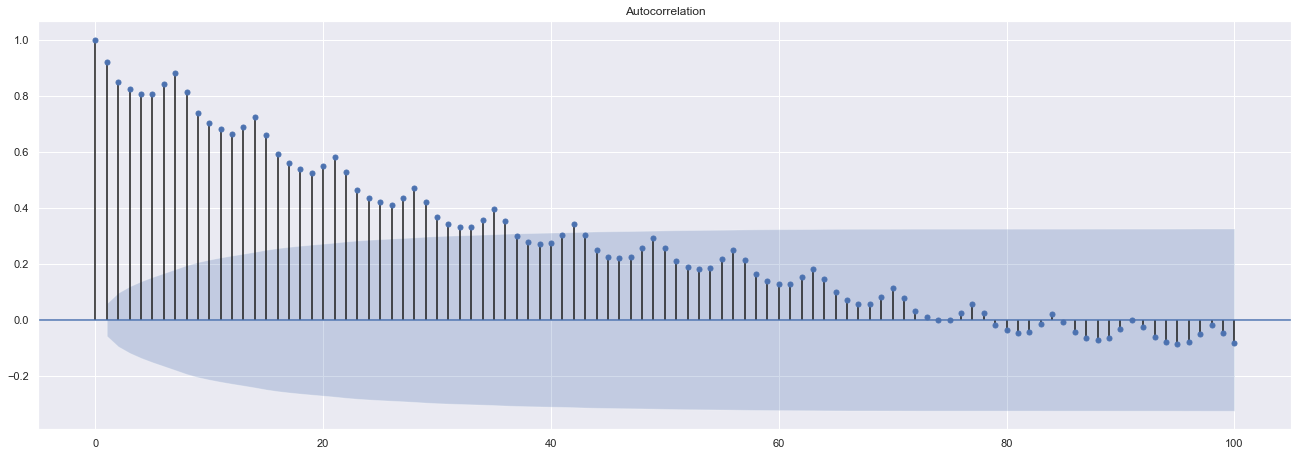

In [37]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_device_forecasts.csv", header=0)
plot_acf(series, lags=100)
pyplot.show()

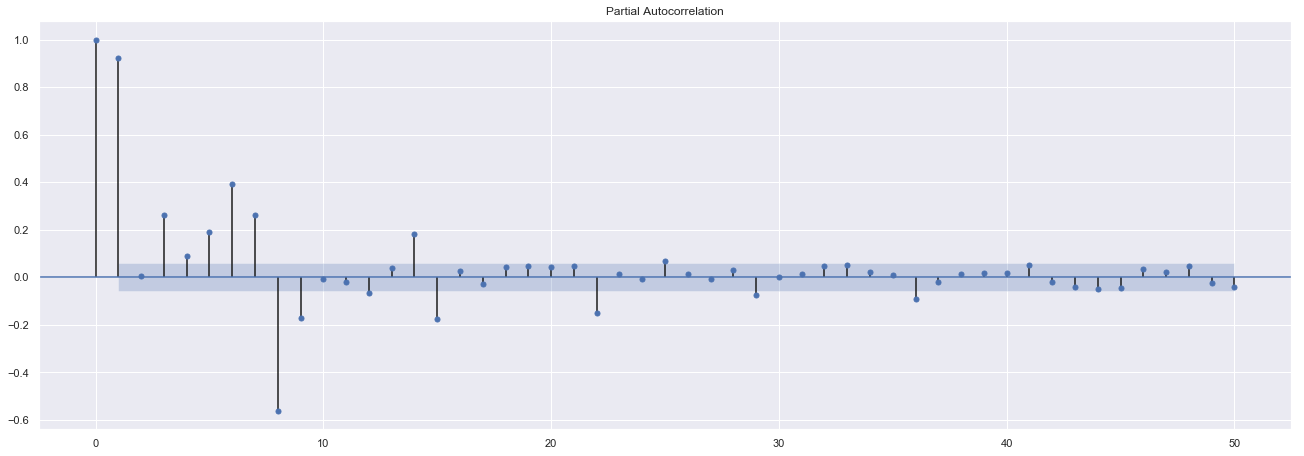

In [38]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = Series.from_csv("/Users/akuppam/Documents/Hprog/Py/Summary/net_bookings_device_forecasts.csv", header=0)
plot_pacf(series, lags=50)
pyplot.show()

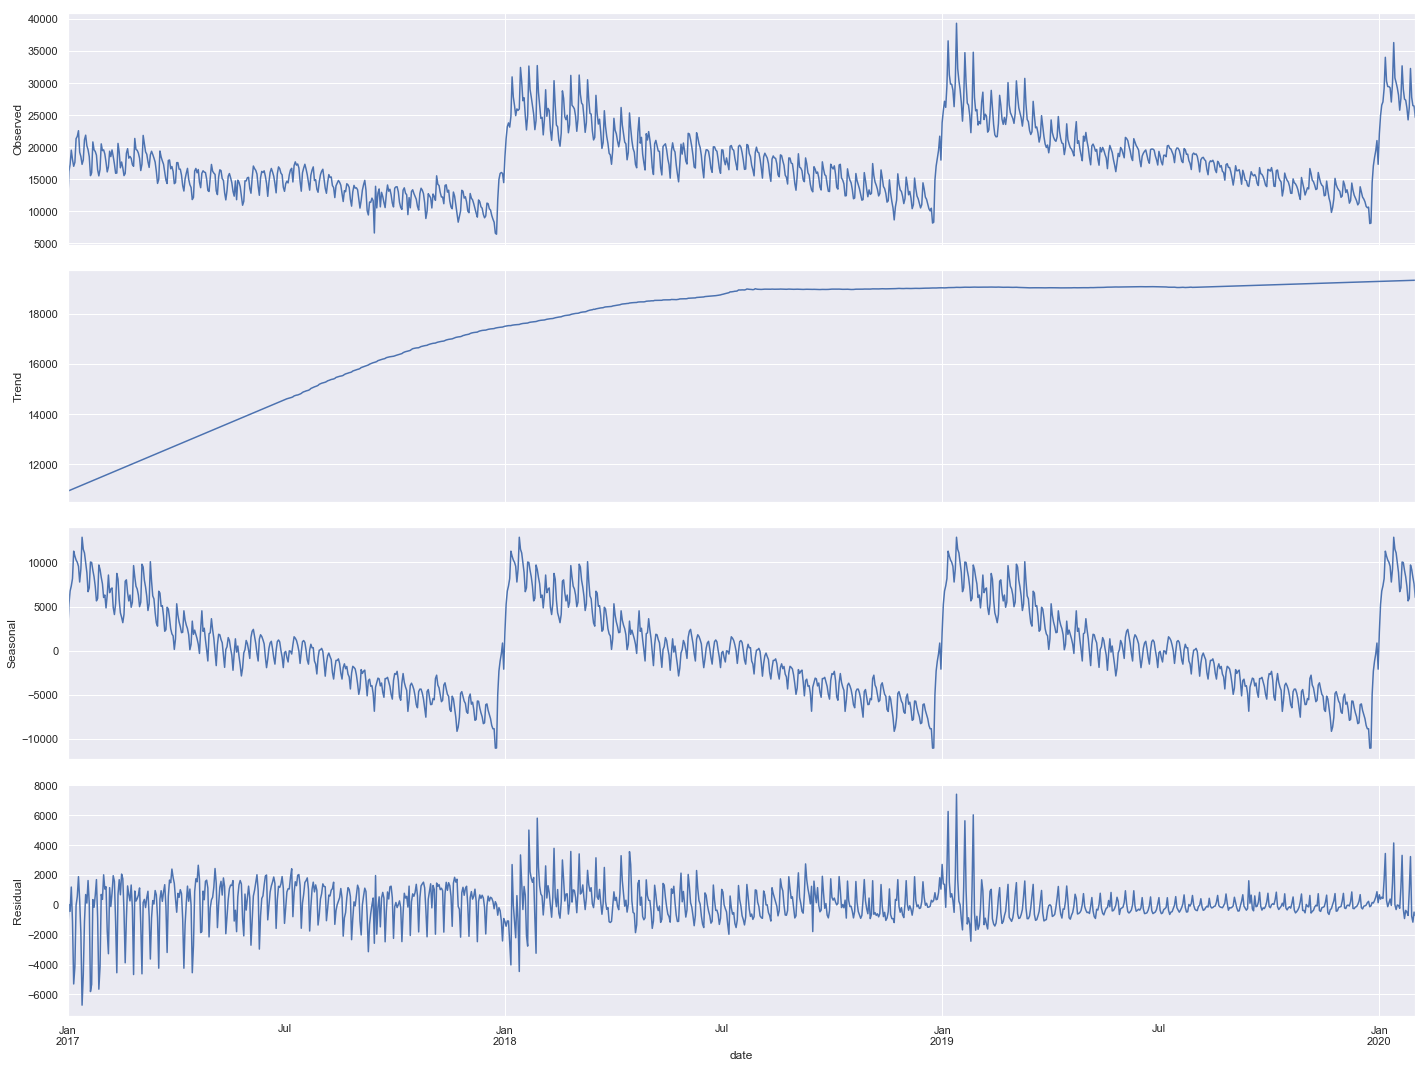

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
sm.tsa.seasonal_decompose(series, freq = 365, extrapolate_trend=True).plot()
plt.show()

In [32]:
df = pd.read_csv("/Users/akuppam/Documents/Hprog/Py/Summary/xAll_device_forecasts_plots.csv")
df.columns = ['Date', 'Unknown', 'desktop', 'mobile App', 'mobile web', 'tablet']
df = df.set_index('Date')
df.head()

,Unknown,desktop,mobile App,mobile web,tablet
Date,,,,,
2017-01-01,806.0,6247.0,536.0,1665.0,1889.0
2017-01-02,1245.0,9830.0,595.0,2338.0,2212.0
2017-01-03,1425.0,10959.0,523.0,2420.0,1976.0
2017-01-04,2579.0,11871.0,709.0,2282.0,2096.0
2017-01-05,1336.0,11555.0,350.0,2814.0,2014.0


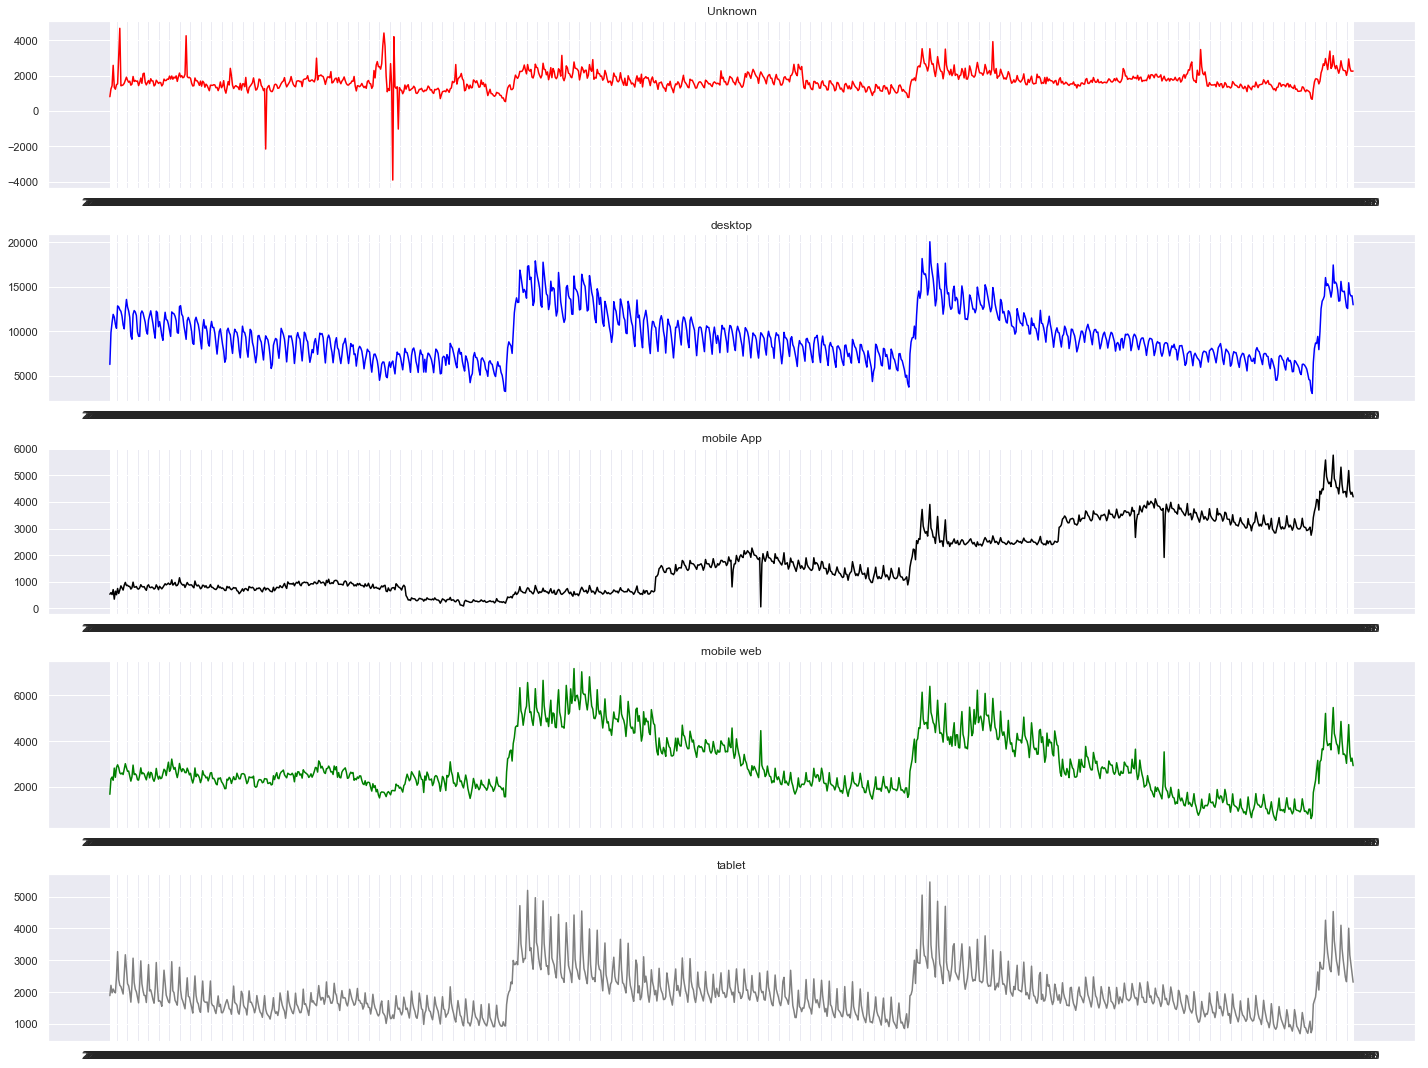

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
# (rows, cols, plot#)
plt.subplot(5, 1, 1)
plt.plot(df.Unknown, color = 'red')
plt.title('Unknown')
plt.subplot(5, 1, 2)
plt.plot(df.desktop, color = 'blue')
plt.title('desktop')
plt.subplot(5, 1, 3)
plt.plot(df['mobile App'], color = 'black')
plt.title('mobile App')
plt.subplot(5, 1, 4)
plt.plot(df['mobile web'], color = 'green')
plt.title('mobile web')
plt.subplot(5, 1, 5)
plt.plot(df.tablet, color = 'grey')
plt.title('tablet')
plt.tight_layout()

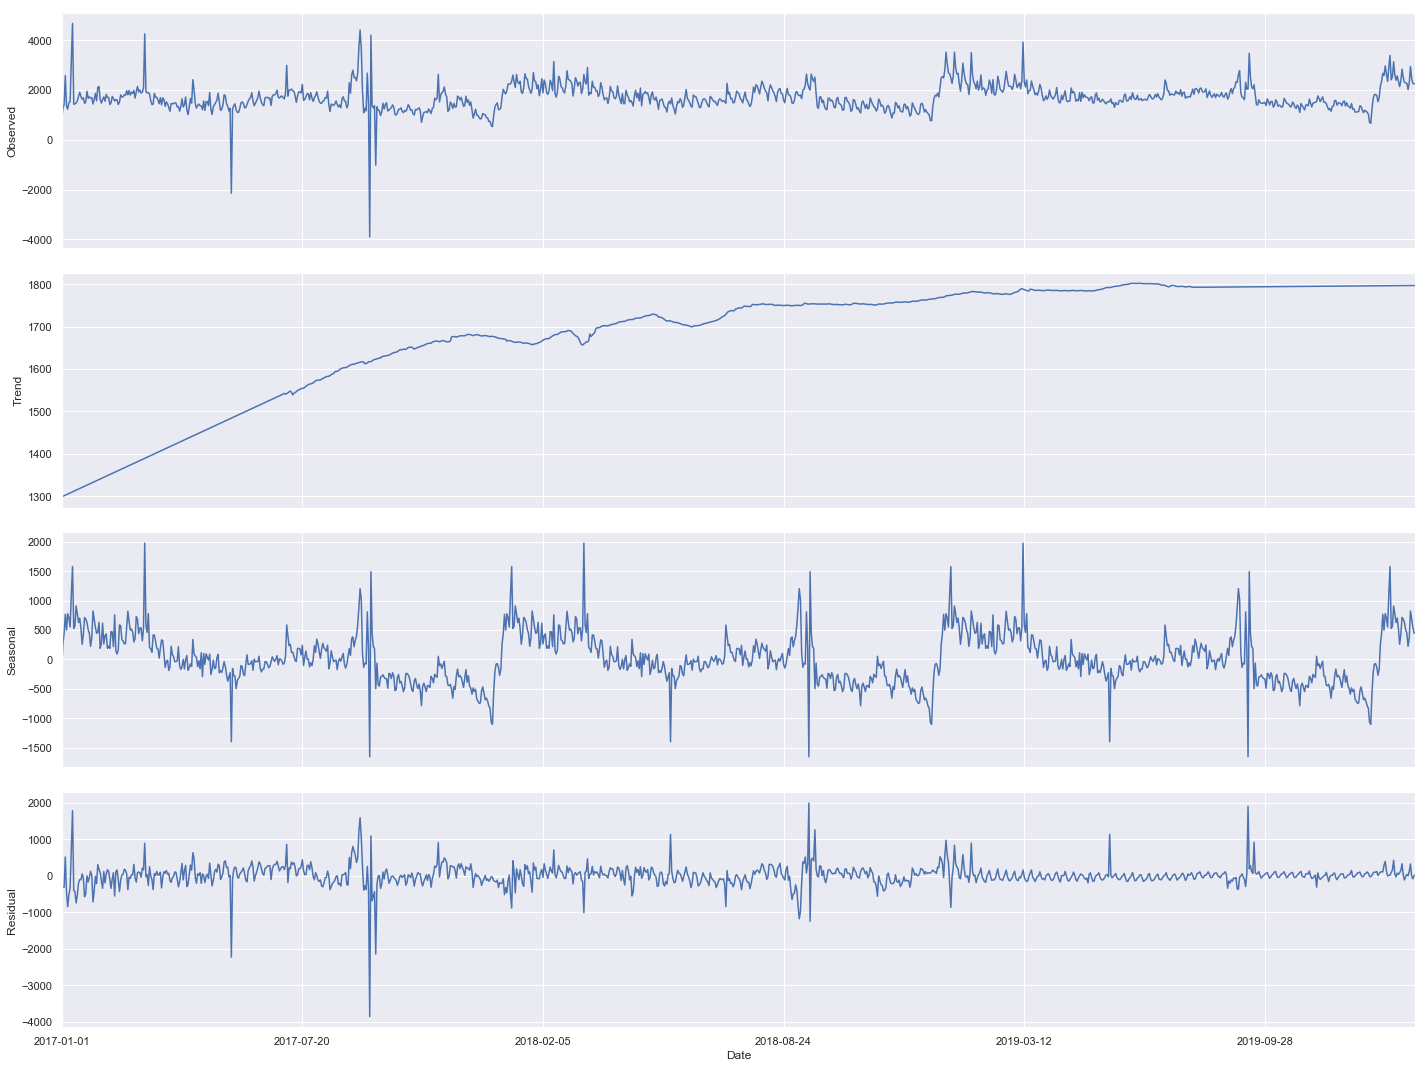

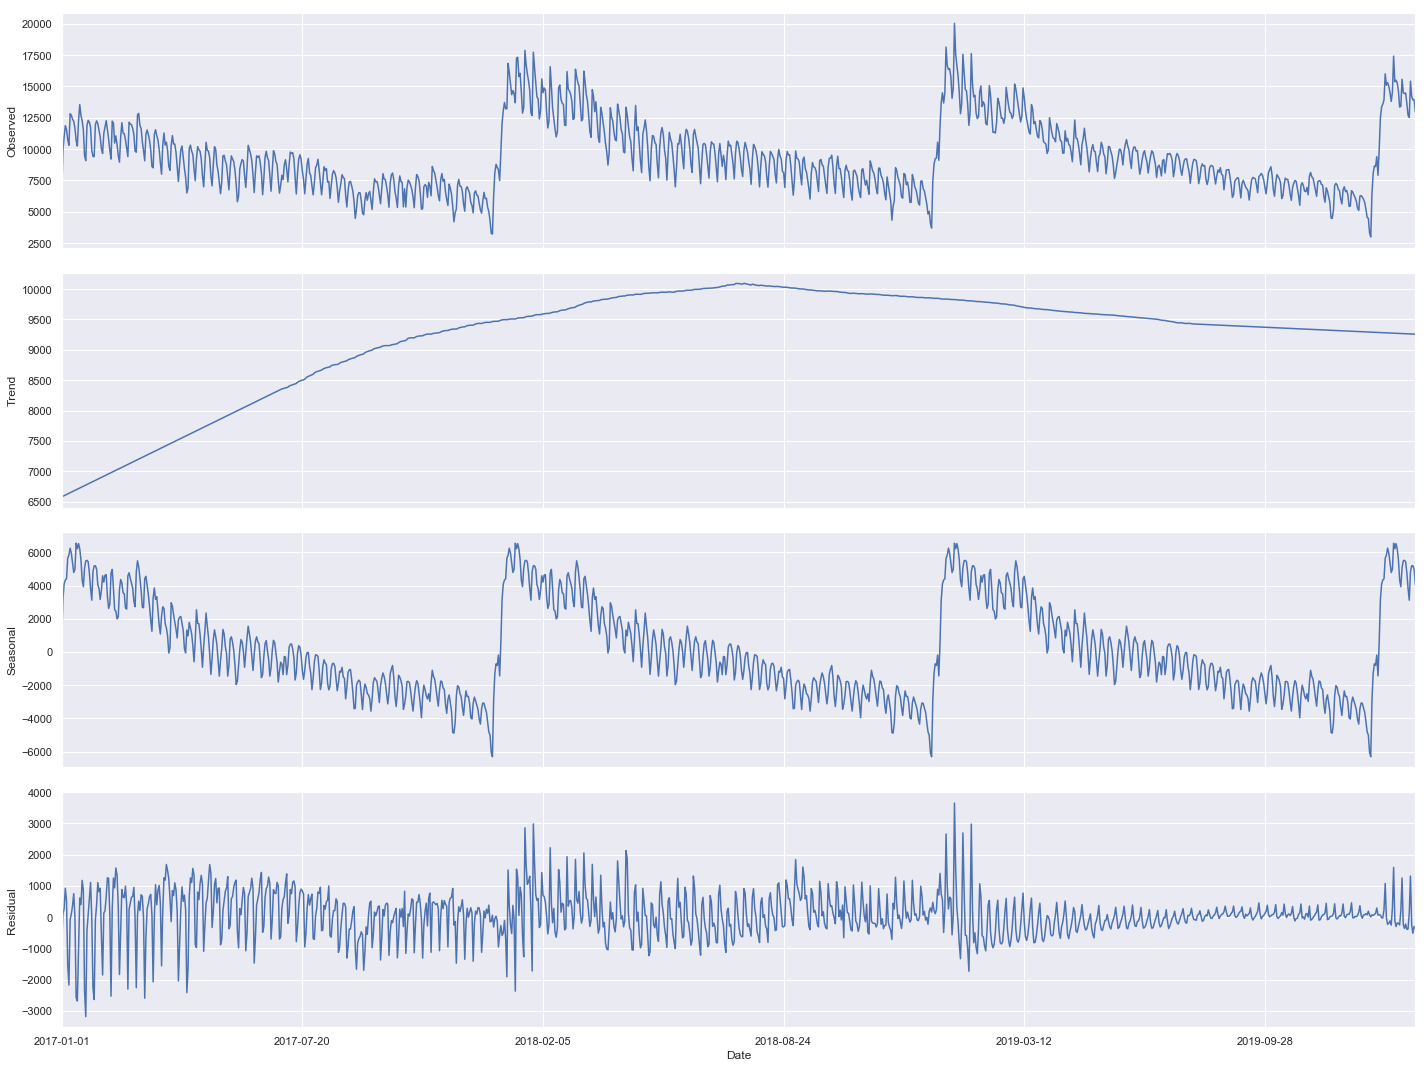

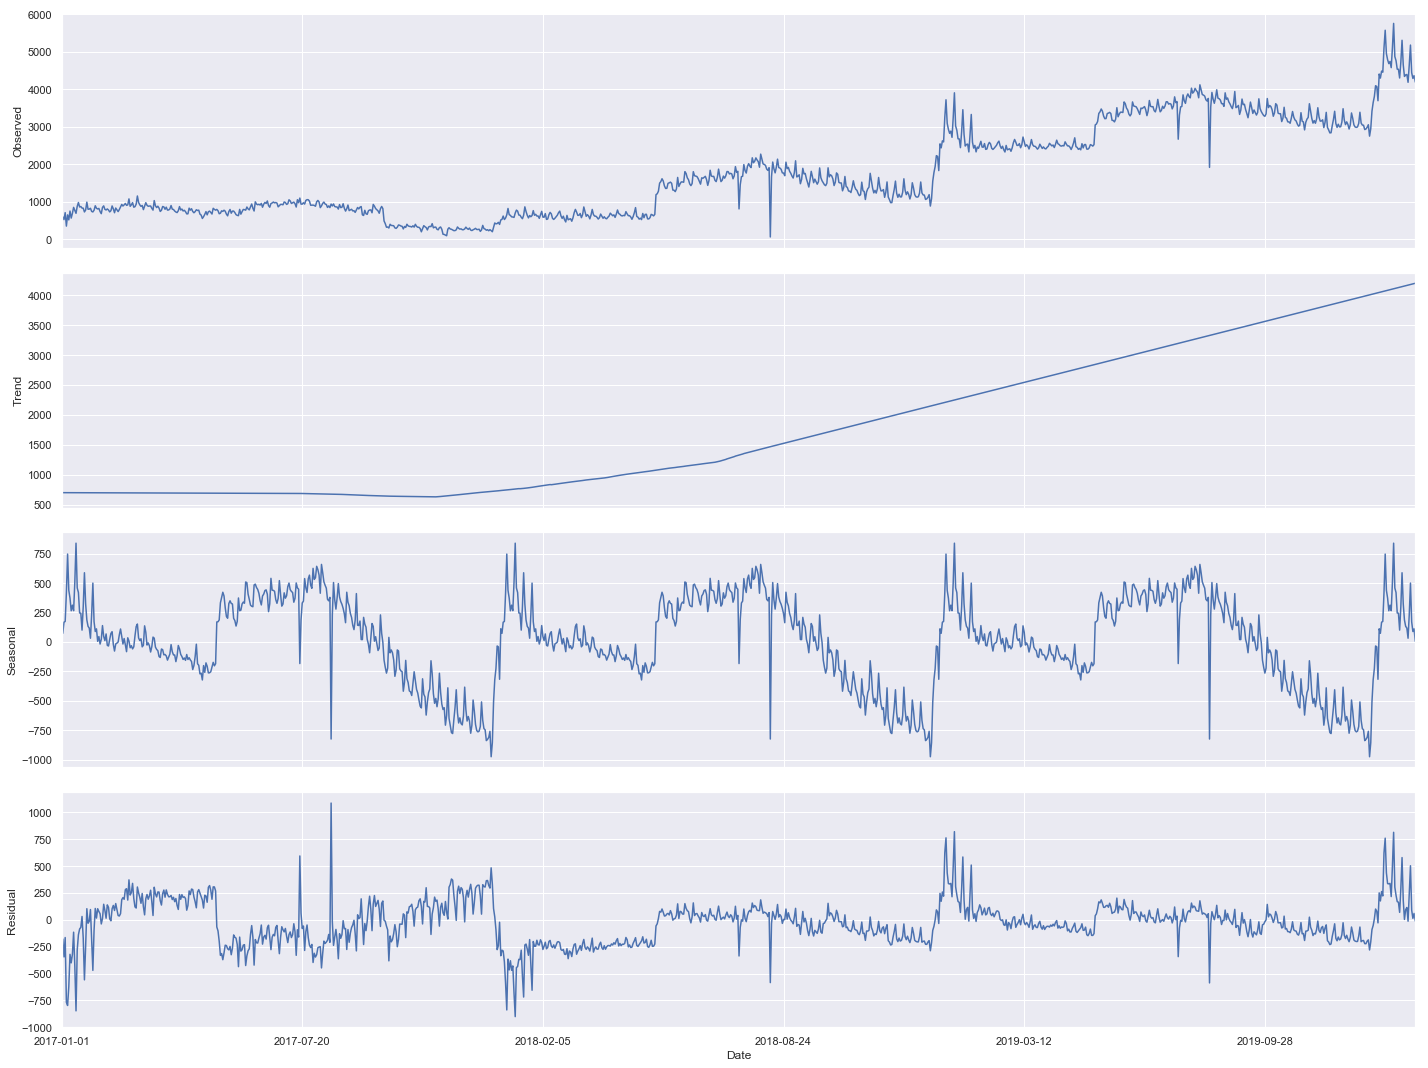

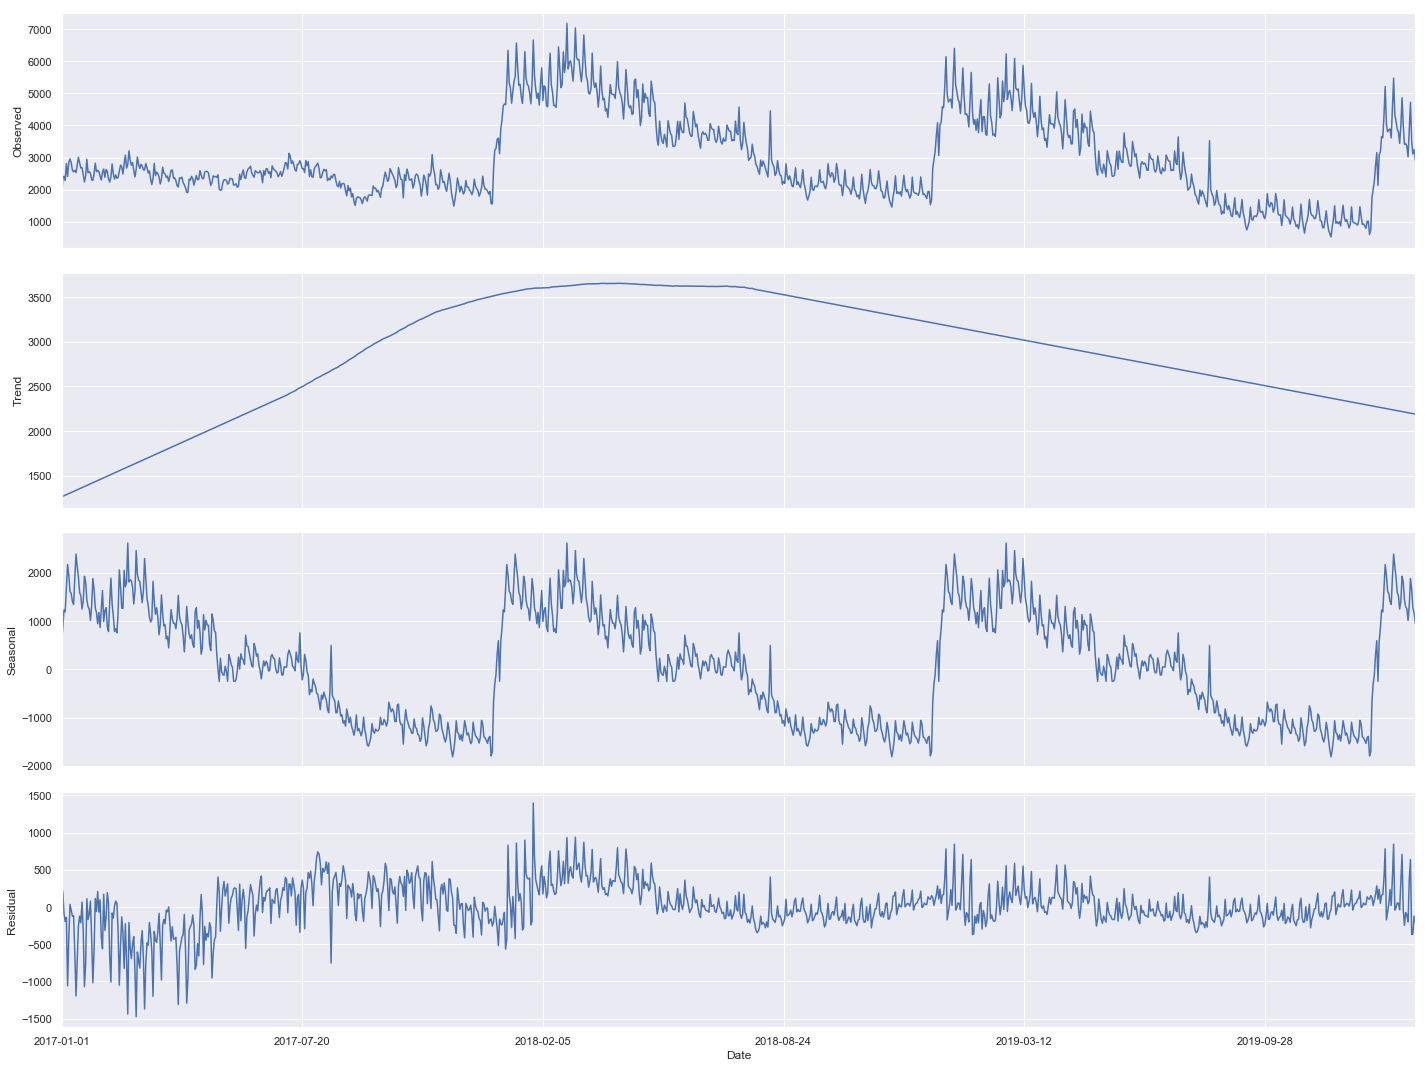

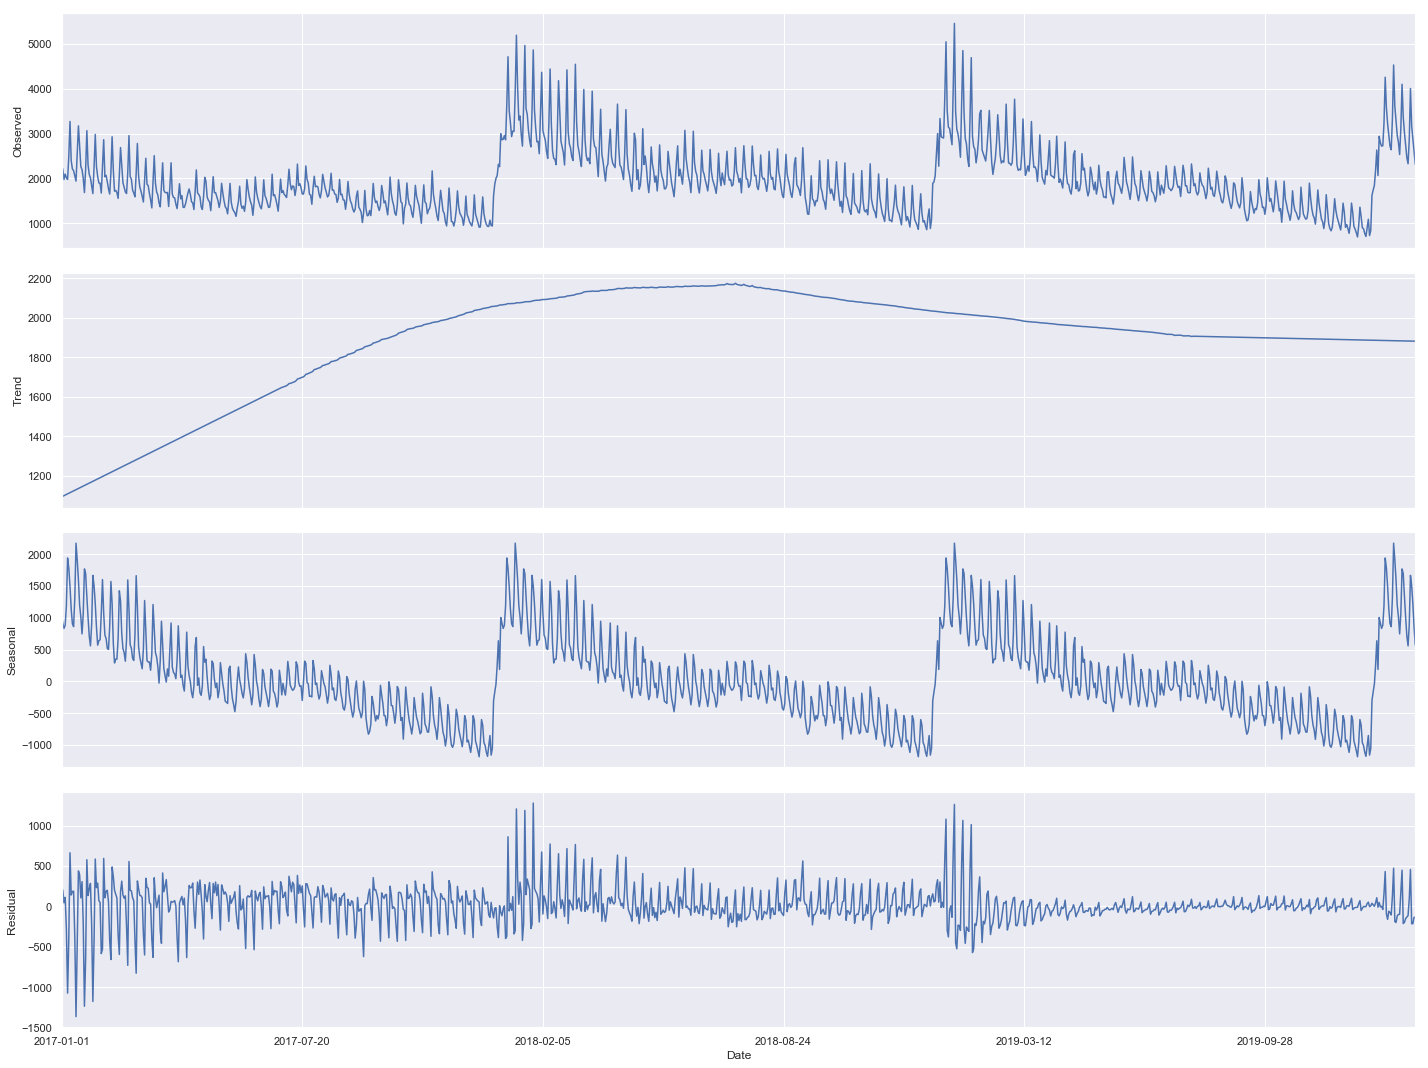

In [40]:
sm.tsa.seasonal_decompose(df['Unknown'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['desktop'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['mobile App'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['mobile web'], freq = 365, extrapolate_trend=True).plot()
sm.tsa.seasonal_decompose(df['tablet'], freq = 365, extrapolate_trend=True).plot()
plt.show()